# Lab Exercise 1 
## Predicting House prices
### Submitted by: Nigel Haim N. Sebastian

#### Importing 
- When Imported pandas it prompts me that "Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0)"

In [908]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Loading and checking the dataset 

In [909]:
data = pd.read_csv("House_Rent_Dataset.csv")
# data.head(10)
data.value_counts()

Posted On   BHK  Rent    Size  Floor            Area Type    Area Locality                  City       Furnishing Status  Tenant Preferred  Bathroom  Point of Contact
2022-04-13  3    260000  1800  10 out of 11     Carpet Area  JVPD Scheme                    Mumbai     Furnished          Family            4         Contact Agent       1
2022-06-22  3    17000   1200  Ground out of 2  Super Area   Selaiyur                       Chennai    Unfurnished        Bachelors/Family  3         Contact Owner       1
                 15000   2200  1 out of 2       Super Area   Irumbuliyur                    Chennai    Unfurnished        Bachelors         3         Contact Owner       1
                         1850  1 out of 1       Super Area   Tarapuri Colony, Secunderabad  Hyderabad  Semi-Furnished     Bachelors/Family  2         Contact Owner       1
                 13000   900   1 out of 4       Super Area   Perambur                       Chennai    Unfurnished        Bachelors/Family  1    

In [910]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# Check for any errors in the floor

- Lowerbasement 0 
- Upperbasement 1
- Ground 2
- 1 and up 
- The type of the row is string
Investigating the data I have discovered that there are words of Ground, Upper Basement and lower basement therefore I have to convert them into integers before I get their floor score. There are also data that are only one there is no comparison for it. I dropped the data 

there is also that it only states "Ground" 

Just like looking at the buttons of an elevator (disregarding the superstition of the 'Thirteenth floor') we assume that if there is a data of "Lower Basement out of 10" then we add 2 more floors since there are additional 2 more underground floors even tho if the elevator states its only up to number 10. We include the underground floors. 

Ground floor will be 0 indicates 1 as the first floor 

When the left side is an integer therefore we already assume that it is in the correct format 

From 4746 we have 3 single digit values drop them 

In [911]:
index = 0

def Floor_Score(row):
    r = str(row).split(' out of ')
    if len(r) == 1:
        return None
    try:
        if 'GROUND' in str(r).upper():
            r[0] = 1
            # r[1] = int(r[1]) + 1
            # print(r[0], r[1])

        elif 'UPPER BASEMENT' in str(r).upper():
            r[0] = 2
            # r[1] = int(r[1]) + 2
            # r[1] = int(r[1])
        elif 'LOWER BASEMENT' in str(r).upper():
            r[0] = 3
            # r[1] = int(r[1]) + 3
        else:
            r[0] = int(r[0])
            r[1] = int(r[1])
        if int(r[0]) > int(r[1]):
            return None

        return int(r[0]) / int(r[1])
    except:
        print("Error")
    index += 1


data['Floor'] = data['Floor'].apply(Floor_Score)
data.dropna(subset=['Floor'], inplace=True)
data.info()
data.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4732 non-null   object 
 1   BHK                4732 non-null   int64  
 2   Rent               4732 non-null   int64  
 3   Size               4732 non-null   int64  
 4   Floor              4732 non-null   float64
 5   Area Type          4732 non-null   object 
 6   Area Locality      4732 non-null   object 
 7   City               4732 non-null   object 
 8   Furnishing Status  4732 non-null   object 
 9   Tenant Preferred   4732 non-null   object 
 10  Bathroom           4732 non-null   int64  
 11  Point of Contact   4732 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 480.6+ KB


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0.500000,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,0.333333,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,0.333333,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,0.500000,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,0.500000,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,1.000000,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,0.250000,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,0.500000,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,0.500000,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,0.333333,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [912]:

# data['Rent'] = data['Rent'].where(data['Rent'] < 0)
# data['Rent'].head()

In [913]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4732 non-null   object 
 1   BHK                4732 non-null   int64  
 2   Rent               4732 non-null   int64  
 3   Size               4732 non-null   int64  
 4   Floor              4732 non-null   float64
 5   Area Type          4732 non-null   object 
 6   Area Locality      4732 non-null   object 
 7   City               4732 non-null   object 
 8   Furnishing Status  4732 non-null   object 
 9   Tenant Preferred   4732 non-null   object 
 10  Bathroom           4732 non-null   int64  
 11  Point of Contact   4732 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 480.6+ KB


**This concludes that there are no null values in the dataset**

In [914]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Data Analysis

<BarContainer object of 6 artists>

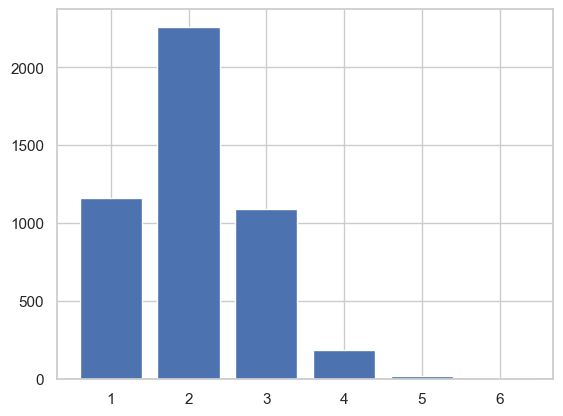

In [915]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

<Axes: xlabel='BHK', ylabel='Rent'>

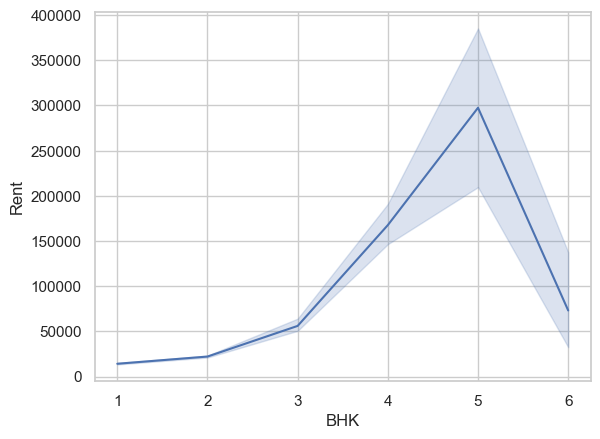

In [916]:
sns.lineplot(x=data['BHK'], y=data['Rent'], data=data)

In [917]:
sorted_date = data.sort_values(by='Posted On') 
# sorted_date.head(20)

<Axes: xlabel='Posted On', ylabel='Rent'>

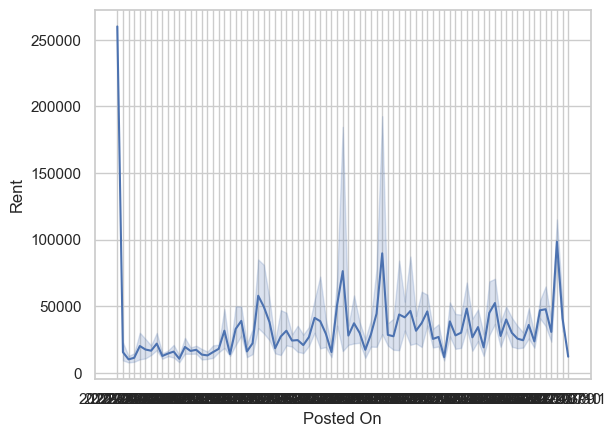

In [918]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=sorted_date['Posted On'], y=sorted_date['Rent'], data=data)

In [919]:
# plt.bar(data['Posted On'], data['Rent'])

# Preprocessing

## Logarithmic Transformation in Linear Regression Models

https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

https://stats.stackexchange.com/questions/145383/getting-negative-predicted-values-after-linear-regression

Text(0.5, 0, 'Price')

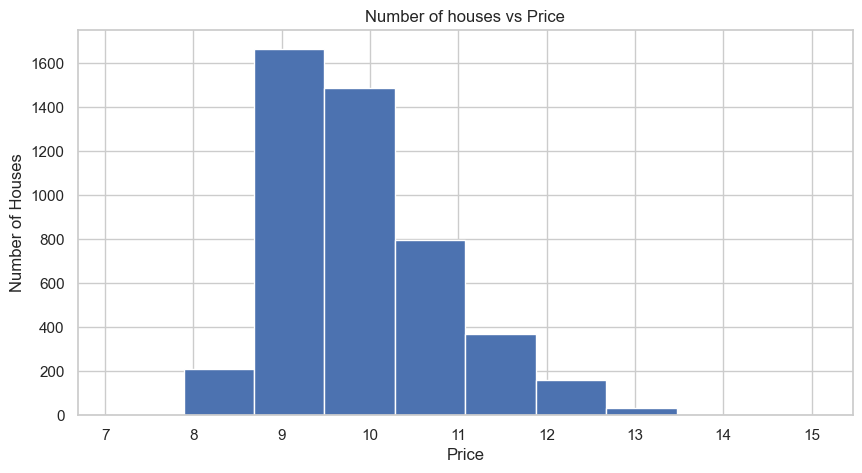

In [936]:
data.hist('Rent', figsize=(10, 5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

### After

Text(0.5, 0, 'Price')

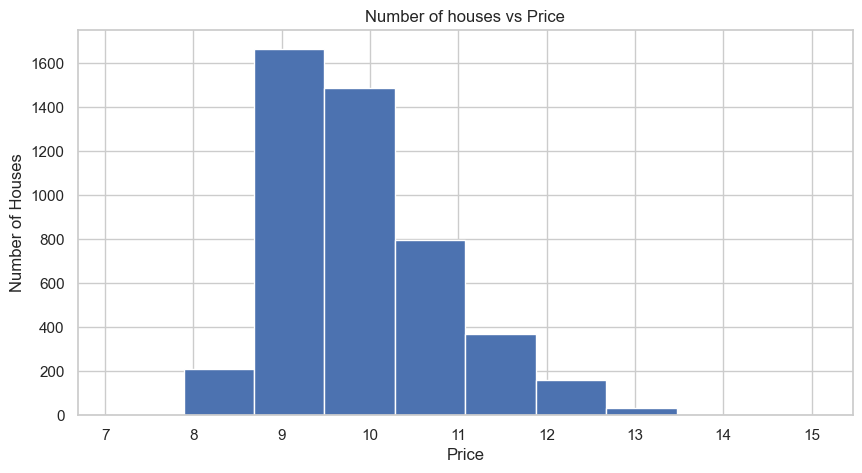

In [921]:
data['Rent'] = np.log(data['Rent'])
data.hist('Rent', figsize=(10, 5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

### Fixing some data for modelling

**Converting all white spaces to undersdcore (_)**

In [922]:
# sorted_date['Area Locality'] = sorted_date['Area Locality'].replace(' ', '_')
# sorted_date.head(20)

### One hot encoding 

In [923]:
# def one_hot_encode(data, column):
#  encoded = pd.get_dummies(data[column], drop_first= True)
#  data = data.drop(column, axis = 1)
#  data = data.join(encoded)
#  return data

In [924]:
def one_hot_encode(data, column):
 encoded = pd.get_dummies(data[column], drop_first= True)
 data = data.drop(column, axis = 1)
 data = data.join(encoded)
 return data

In [925]:
def one_hot_encode_AL(data, column):
 encoded = pd.get_dummies(data[column], drop_first= True)
 data = data.drop(column, axis = 1)
 data = data.merge(encoded, how='left')
 return data

### Adding values of Area Type and City

In [926]:
# data = sorted_date[['BHK', 'Bathroom', 'Furnishing Status', 'Rent', 'Area Type', 'City', 'Size', 'Point of Contact', 'Area Locality']]
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent', 'City', 'Size', 'Tenant Preferred', 'Point of Contact', 'Floor']]
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Point of Contact')
# data = one_hot_encode(data, 'Area Locality')
data = one_hot_encode(data, 'Tenant Preferred')
data

,BHK,Bathroom,Rent,Size,Floor,Semi-Furnished,Unfurnished,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Contact Builder,Contact Owner,Bachelors/Family,Family
0,2,2,9.210340,1100,0.500000,False,True,False,False,False,True,False,False,True,True,False
1,2,1,9.903488,800,0.333333,True,False,False,False,False,True,False,False,True,True,False
2,2,1,9.740969,1000,0.333333,True,False,False,False,False,True,False,False,True,True,False
3,2,1,9.210340,800,0.500000,False,True,False,False,False,True,False,False,True,True,False
4,2,1,8.922658,850,0.500000,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,9.615805,1000,0.600000,True,False,False,False,True,False,False,False,True,True,False
4742,3,3,10.275051,2000,0.250000,True,False,False,False,True,False,False,False,True,True,False
4743,3,3,10.463103,1750,0.600000,True,False,False,False,True,False,False,False,False,True,False
4744,3,2,10.714418,1500,0.676471,True,False,False,False,True,False,False,False,False,False,True


### Training and Test Spill

In [927]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [928]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardize

In [929]:
# from sklearn.preprocessing import PolynomialFeatures -11k
from sklearn.preprocessing import StandardScaler 
# 0.57
# from sklearn.preprocessing import MinMaxScaler
# 0.57
from sklearn.preprocessing import RobustScaler 
# 0.57
sc = StandardScaler()

# sc = RobustScaler()
X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
X_test = sc.transform(X_test)
print(X_test)

[[-1.30599065 -1.09274055 -1.3504788  ...  0.68882787 -1.63328983
  -0.33014394]
 [-1.30599065 -1.09274055 -1.05859635 ... -1.45174149  0.61226121
  -0.33014394]
 [ 1.09360868  1.15754399  0.99246953 ... -1.45174149  0.61226121
  -0.33014394]
 ...
 [-0.10619099  0.03240172  0.20359804 ...  0.68882787  0.61226121
  -0.33014394]
 [-1.30599065 -1.09274055 -0.59158442 ...  0.68882787  0.61226121
  -0.33014394]
 [-0.10619099  0.03240172 -0.44327658 ... -1.45174149 -1.63328983
  -0.33014394]]


### Modeling 

In [930]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 2.05659615e-01,  1.42615303e-01,  2.56490926e-01, -7.06261448e-03,
       -7.88906677e-02, -1.24105728e-01, -1.99067753e-02,  5.85419546e-02,
       -6.26337391e-02, -9.08642148e-02,  3.82153654e-01,  1.59594560e-16,
       -1.86357150e-01, -2.15735617e-02, -3.20544400e-02])

### Quantitative Evaluation

In [931]:
y_preds = model.predict(X_test)
print(y_preds)

[ 8.75284054  8.93459574 10.50336002  9.78178589  9.89550278  9.70138122
 10.32790166 11.86080715 10.85752537  9.31311187 10.13509814  9.2865499
  8.65398848  8.85883156  8.74136413  9.24643711 10.21514278  9.44797223
  9.01919708  8.58215762  9.36784014  8.84673408  8.76426216  9.53555913
  9.49710786  9.75334553 10.72846366  9.68090046 10.55199527  9.02858214
  9.67243762  8.86901086  8.91320857  8.64918364 10.5911761   9.19820175
 10.22227887 12.63123839  9.3944021   9.87386991  8.96385554 10.45540036
  9.68359332 10.00129141 10.94649352  8.8011831   9.51807653  9.5246003
 11.12682036  9.13633945  9.00190801  9.05554962  9.31030145 11.89738954
  8.9286588  10.77863955  9.92960023  8.82306929  9.42464366 10.02931634
  9.44331581  9.24490649  9.29706159  9.38160904 11.09479455 11.77724633
  9.49247141  9.10931821  8.99227527  9.31198318 10.77380818  9.19985937
 10.77490425  9.23646699  9.51285041  9.40594639  9.38417598  9.60137692
  9.52842591  9.47070101  9.21591593  9.06849628 10.5

#### The coefficients

In [932]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 2.05659615e-01  1.42615303e-01  2.56490926e-01 -7.06261448e-03
 -7.88906677e-02 -1.24105728e-01 -1.99067753e-02  5.85419546e-02
 -6.26337391e-02 -9.08642148e-02  3.82153654e-01  1.59594560e-16
 -1.86357150e-01 -2.15735617e-02 -3.20544400e-02]


#### The mean squared error

In [933]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 0.14


In [934]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.84


### Graph of the predicted and actual values

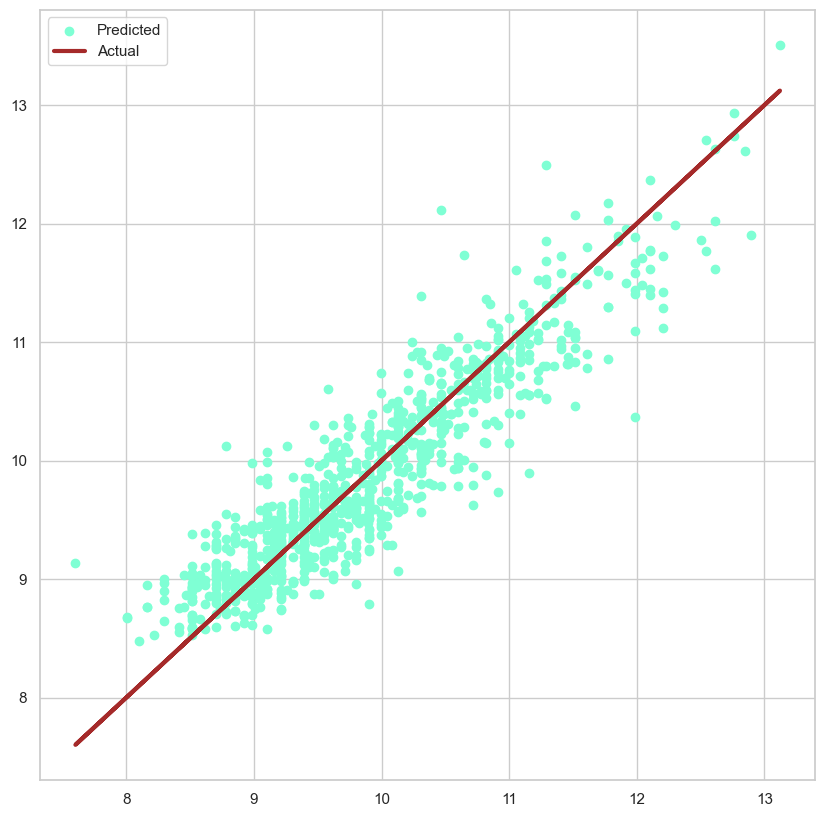

In [935]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_preds, color='aquamarine', label='Predicted' )
plt.plot(y_test, y_test, color='brown', linewidth=3, label='Actual')
plt.legend()